In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

2023-09-18 10:28:32.180717: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 10:28:33.503070: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-18 10:28:37.591053: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

--2023-09-18 10:28:43--  https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70702765 (67M) [application/zip]
Saving to: ‘cats_and_dogs.zip’

cats_and_dogs.zip   100%[===================>]  67.43M   332KB/s    in 5m 48s  

2023-09-18 10:34:33 (198 KB/s) - ‘cats_and_dogs.zip’ saved [70702765/70702765]

Archive:  cats_and_dogs.zip
   creating: cats_and_dogs/
  inflating: cats_and_dogs/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/cats_and_dogs/
  inflating: __MACOSX/cats_and_dogs/._.DS_Store  
   creating: cats_and_dogs/test/
  inflating: cats_and_dogs/test/48.jpg  
   creating: __MACOSX/cats_and_dogs/test/
  inflating: __MACOSX/cats_and_dogs/test/._48.jpg  
  inflating: cats_and_dogs/test/49.jpg  
  inflating: __

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the image data generators
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

val_data_gen = validation_image_generator.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
    
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the variables correctly based on the directory structure
train_dir = 'cats_and_dogs/train'
validation_dir = 'cats_and_dogs/validation'
test_dir = 'cats_and_dogs/test'

# Set the target size for resizing the images
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Set up the image data generators
train_data_gen = ImageDataGenerator(rescale=1./255)
validation_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)

# Flow from directory for the train data
train_generator = train_data_gen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

# Flow from directory for the validation data
validation_generator = validation_data_gen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary'
)

# Flow from directory for the test data
test_generator = test_data_gen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=1,
    class_mode=None,
    shuffle=False
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


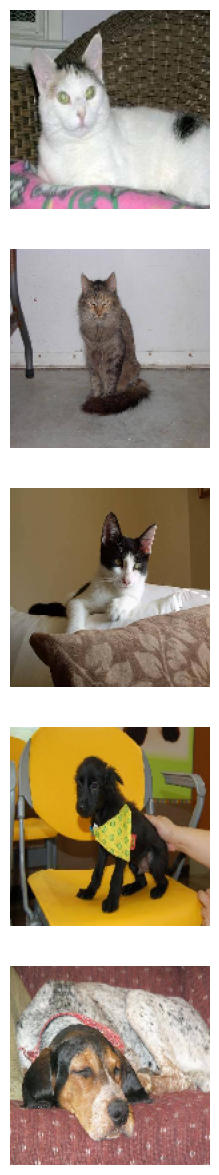

In [4]:
#4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [5]:
#5
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create the image data generator for training set with random transformations
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,  # Random rotation between -40 and 40 degrees
    width_shift_range=0.2,  # Random horizontal shift by 20% of the image width
    height_shift_range=0.2,  # Random vertical shift by 20% of the image height
    shear_range=0.2,  # Random shearing transformation
    zoom_range=0.2,  # Random zooming by up to 20%
    horizontal_flip=True,  # Random horizontal flipping of images
    fill_mode='nearest'  # Fill any newly created pixels after transformations with the nearest value
)

Found 2000 images belonging to 2 classes.


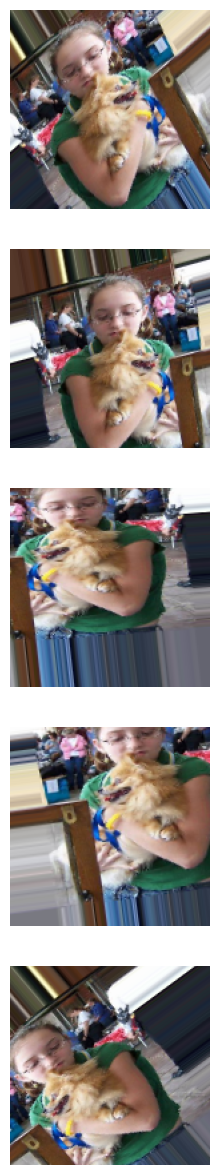

In [6]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [7]:
# 7
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

2023-09-18 10:34:43.183610: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37879808 exceeds 10% of free system memory.
2023-09-18 10:34:43.229771: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37879808 exceeds 10% of free system memory.
2023-09-18 10:34:43.272203: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37879808 exceeds 10% of free system memory.


                                                                 
 dense (Dense)               (None, 256)               9470208   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 9563713 (36.48 MB)
Trainable params: 9563713 (36.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# 8
# # Define the number of training and validation steps
train_steps_per_epoch = train_data_gen.n // batch_size
val_steps_per_epoch = val_data_gen.n // batch_size
# Train the model
history = model.fit(
    train_data_gen,
    steps_per_epoch=train_steps_per_epoch,
    epochs=10,
    validation_data=val_data_gen,
    validation_steps=val_steps_per_epoch
)

2023-09-18 10:34:44.411308: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 34560000 exceeds 10% of free system memory.


Epoch 1/10


2023-09-18 10:34:45.381193: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37879808 exceeds 10% of free system memory.


15/15 [==============================] - 385s 25s/step - loss: 1.0116 - accuracy: 0.4973 - val_loss: 0.6923 - val_accuracy: 0.5123
Epoch 2/10
15/15 [==============================] - 138s 9s/step - loss: 0.6924 - accuracy: 0.5085 - val_loss: 0.6889 - val_accuracy: 0.5078
Epoch 3/10
15/15 [==============================] - 150s 10s/step - loss: 0.6927 - accuracy: 0.5123 - val_loss: 0.6861 - val_accuracy: 0.5033
Epoch 4/10
15/15 [==============================] - 174s 12s/step - loss: 0.6903 - accuracy: 0.5294 - val_loss: 0.6964 - val_accuracy: 0.5033
Epoch 5/10
15/15 [==============================] - 141s 10s/step - loss: 0.6894 - accuracy: 0.5283 - val_loss: 0.6705 - val_accuracy: 0.5335
Epoch 6/10
15/15 [==============================] - 207s 12s/step - loss: 0.6707 - accuracy: 0.5817 - val_loss: 0.6396 - val_accuracy: 0.6183
Epoch 7/10
15/15 [==============================] - 254s 13s/step - loss: 0.6851 - accuracy: 0.5625 - val_loss: 0.6824 - val_accuracy: 0.5379
Epoch 8/10
15/15 [

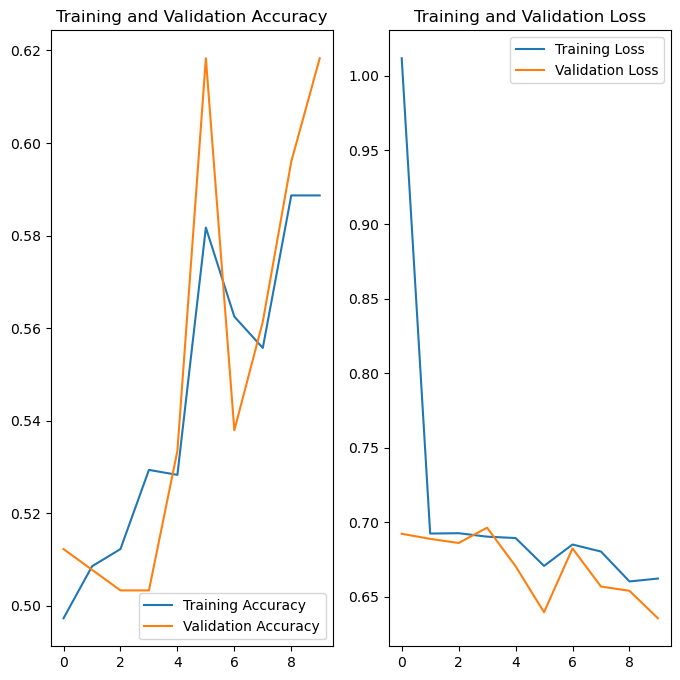

In [9]:
##9
import matplotlib.pyplot as plt

epochs = 10  # Define the number of epochs

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [10]:
#10
import numpy as np
import matplotlib.pyplot as plt

# Get the predicted probabilities for the test images
probabilities = model.predict(test_data_gen)

# Convert the probabilities to integers
probabilities = np.round(probabilities).astype(int)

# Plot the test images along with their probabilities
def plotImages(images, probabilities):
    fig, axes = plt.subplots(5, 10, figsize=(12, 8))
    axes = axes.flatten()

    for i, (img, prob) in enumerate(zip(images, probabilities)):
        axes[i].imshow(img)
        axes[i].set_title(f'Cat: {prob[0]}, Dog: {prob[1]}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Get the test images from the test data generator
test_images = []
for i in range(50):
    test_images.append(test_data_gen[i][0][0])

# Call the plotImages function and pass in the test images and probabilities
plotImages(test_images, probabilities)

ValueError: Asked to retrieve element 0, but the Sequence has length 0

In [ ]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")